# **База 2gis по Москве по местам досуга (37835)**

`ID, Название, Регион, Район, Город, Район города, Адрес, Индекс, Телефон, Мобильный телефон, Email, Сайт, Рубрика, Подрубрика, Рейтинг, Кол-во отзывов, Кол-во оценок, Время работы, Способ оплаты, whatsapp, viber, telegram, facebook, instagram, vkontakte, odnoklassniki, youtube, twitter, skype, icq, googleplus, linkedin, pinterest, Координаты (широта, долгота), Дата создания, Дата обновления`

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import json

In [105]:
df = pd.read_excel('../data/gis.xlsx')
print("Размерность датасета:", df.shape)
print()
print("Колонки датасета:", df.columns)
print()
print("Информация о датасете:")
print(df.info())

Размерность датасета: (37835, 35)

Колонки датасета: Index(['ID', 'Название', 'Регион', 'Район', 'Город', 'Район города', 'Адрес',
       'Индекс', 'Телефон', 'Мобильный телефон', 'Email', 'Сайт', 'Рубрика',
       'Подрубрика', 'Рейтинг', 'Кол-во отзывов', 'Кол-во оценок',
       'Время работы', 'Способы оплаты', 'whatsapp', 'viber', 'telegram',
       'facebook', 'instagram', 'vkontakte', 'odnoklassniki', 'youtube',
       'twitter', 'skype', 'icq', 'googleplus', 'linkedin', 'pinterest',
       'Широта', 'Долгота'],
      dtype='object')

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37835 entries, 0 to 37834
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 37835 non-null  int64  
 1   Название           37835 non-null  object 
 2   Регион             37835 non-null  object 
 3   Район              27 non-null     object 
 4   Город              37835 non

In [106]:
df.duplicated().sum()

np.int64(0)

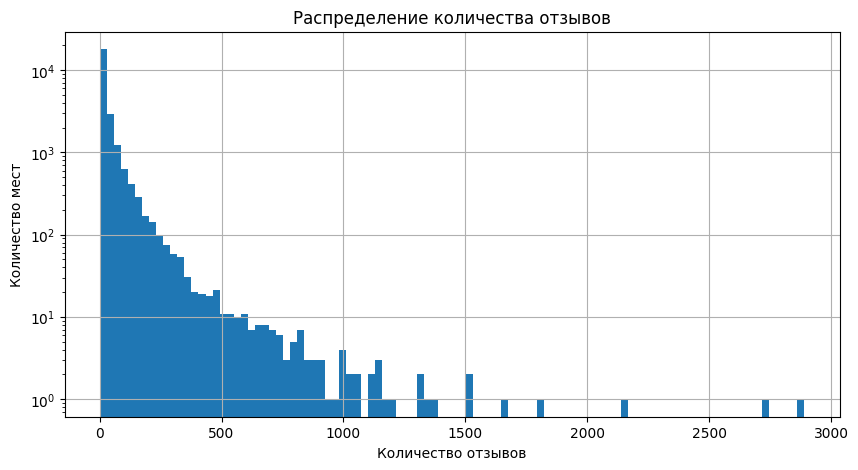

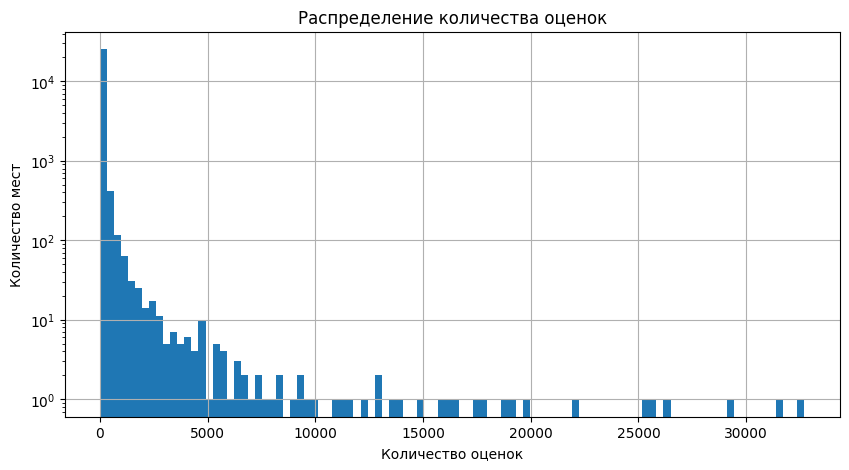

In [107]:
df["Кол-во отзывов"].hist(bins=100, log=True, figsize=(10, 5))
plt.title("Распределение количества отзывов")
plt.xlabel("Количество отзывов")
plt.ylabel("Количество мест")
plt.show()

df["Кол-во оценок"].hist(bins=100, log=True, figsize=(10, 5))
plt.title("Распределение количества оценок")
plt.xlabel("Количество оценок")
plt.ylabel("Количество мест")
plt.show()

In [108]:
df_with_reviews = df[(df["Кол-во отзывов"] > 10)&(df["Кол-во оценок"] > 10)]
print(f"{len(df_with_reviews)}/{len(df)} записей ({len(df_with_reviews)/len(df)*100:.1f}%)")

12059/37835 записей (31.9%)


In [109]:
print("Статистика по рейтингам:")
print(df_with_reviews["Рейтинг"].describe())

Статистика по рейтингам:
count    12059.000000
mean         4.564558
std          0.551309
min          0.000000
25%          4.400000
50%          4.800000
75%          4.900000
max          5.000000
Name: Рейтинг, dtype: float64


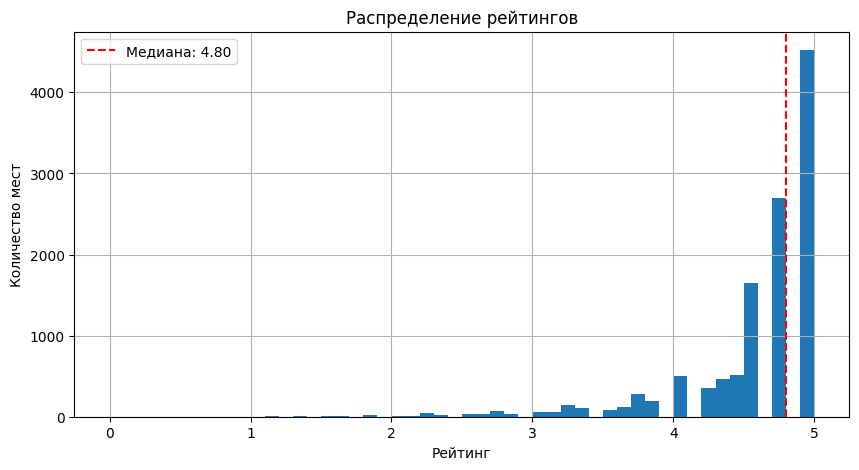

In [110]:
df_with_reviews["Рейтинг"].hist(bins=50, figsize=(10, 5))
plt.title("Распределение рейтингов")
plt.xlabel("Рейтинг")
plt.ylabel("Количество мест")
plt.axvline(x=df_with_reviews["Рейтинг"].median(), color='r', linestyle='--', label=f'Медиана: {df_with_reviews["Рейтинг"].median():.2f}')
plt.legend()
plt.show()

In [111]:
print(f"Уникальных рубрик: {df_with_reviews['Рубрика'].nunique()}")
print(df_with_reviews["Рубрика"].value_counts().head(20))

Уникальных рубрик: 291
Рубрика
Красота / Здоровье                                                                     3924
Общественное питание                                                                   3407
Туризм / Отдых                                                                          875
Общественное питание, Спецмагазины, Торговые комплексы                                  506
Места отдыха / Развлекательные заведения, Общественное питание                          450
Красота / Здоровье, Медицинские услуги                                                  399
Места отдыха / Развлекательные заведения                                                389
Спортивные клубы / школы                                                                293
Дополнительное образование / Развивающие курсы, Красота / Здоровье                      266
Общественное питание, Продукты питания                                                  218
Напитки, Общественное питание                    

In [112]:
print(f"Уникальных подрубрик: {df_with_reviews['Подрубрика'].nunique()}")
print(df_with_reviews["Подрубрика"].value_counts().head(20))

Уникальных подрубрик: 1929
Подрубрика
Быстрое питание, Доставка еды                                            558
Гостиницы                                                                556
Барбершопы                                                               477
Доставка еды, Доставка продуктов, Кулинарии, Супермаркеты                477
Доставка еды, Рестораны                                                  339
Ногтевые студии, Услуги по оформлению ресниц / бровей                    337
Доставка еды, Кафе                                                       335
Ногтевые студии                                                          231
Кофейни                                                                  215
Центры паровых коктейлей                                                 184
Хостелы                                                                  175
Кафе                                                                     166
Ногтевые студии, Парикмахерские, Услуг

In [113]:
mean_rating = df_with_reviews["Рейтинг"].mean()
print(f"Средний рейтинг: {mean_rating:.2f}")

df_good_places = df_with_reviews[df_with_reviews["Рейтинг"] >= mean_rating].copy()
print(f"Хороших мест (рейтинг >= {mean_rating:.2f}): {len(df_good_places)}")


Средний рейтинг: 4.56
Хороших мест (рейтинг >= 4.56): 8116


In [114]:
rubrics_with_commas = df_good_places['Рубрика'].str.contains(',', na=False).sum()
subrubrics_with_commas = df_good_places['Подрубрика'].str.contains(',', na=False).sum()
print(f"Записей с запятыми в рубрике: {rubrics_with_commas} ({rubrics_with_commas/len(df_good_places)*100:.1f}%)")
print(f"Записей с запятыми в подрубрике: {subrubrics_with_commas} ({subrubrics_with_commas/len(df_good_places)*100:.1f}%)")


Записей с запятыми в рубрике: 2302 (28.4%)
Записей с запятыми в подрубрике: 5505 (67.8%)


In [115]:
def create_tags(row):
    tags = set()
    
    if pd.notna(row['Рубрика']):
        rubric = str(row['Рубрика']).strip()
        rubric_tags = [tag.strip() for tag in rubric.split(',') if tag.strip()]
        tags.update(rubric_tags)
    
    if pd.notna(row['Подрубрика']):
        subrubric = str(row['Подрубрика']).strip()
        subrubric_tags = [tag.strip() for tag in subrubric.split(',') if tag.strip()]
        tags.update(subrubric_tags)
    
    return sorted(list(tags))


In [116]:
df_good_places['Теги'] = df_good_places.apply(create_tags, axis=1)

for idx in range(min(4, len(df_good_places))):
    row = df_good_places.iloc[idx]
    print(f"\n{idx+1}. {row['Название']}")
    print(f"Рубрика: {row['Рубрика']}")
    print(f"Подрубрика: {row['Подрубрика']}")
    print(f"Теги ({len(row['Теги'])}): {row['Теги']}")


1. Health club, центр врачебной косметологии, красоты и СПА
Рубрика: Красота / Здоровье, Медицинские услуги
Подрубрика: SPA-процедуры, Косметолог, Массажист, Ногтевые студии, Парикмахерские, Подолог, Процедурный кабинет, Услуги по оформлению ресниц / бровей, Эпиляция
Теги (11): ['SPA-процедуры', 'Косметолог', 'Красота / Здоровье', 'Массажист', 'Медицинские услуги', 'Ногтевые студии', 'Парикмахерские', 'Подолог', 'Процедурный кабинет', 'Услуги по оформлению ресниц / бровей', 'Эпиляция']

2. Accenti, ресторан итальянской кухни
Рубрика: Общественное питание
Подрубрика: Доставка еды, Рестораны
Теги (3): ['Доставка еды', 'Общественное питание', 'Рестораны']

3. ВкусВилл, супермаркет
Рубрика: Общественное питание, Спецмагазины, Торговые комплексы
Подрубрика: Доставка еды, Доставка продуктов, Супермаркеты
Теги (6): ['Доставка еды', 'Доставка продуктов', 'Общественное питание', 'Спецмагазины', 'Супермаркеты', 'Торговые комплексы']

4. Мы, лаундж-бар
Рубрика: Места отдыха / Развлекательные зав

**Статистика по количеству тегов на место**

In [117]:
tag_counts_per_place = df_good_places['Теги'].apply(len)
print(f"Среднее: {tag_counts_per_place.mean():.1f}")
print(f"Медиана: {tag_counts_per_place.median():.0f}")
print(f"Минимум: {tag_counts_per_place.min()}")
print(f"Максимум: {tag_counts_per_place.max()}")

print(tag_counts_per_place.value_counts().sort_index().head(15))

Среднее: 4.3
Медиана: 3
Минимум: 2
Максимум: 52
Теги
2     2611
3     1497
4     1312
5      623
6      525
7      812
8      252
9      217
10     101
11      43
12      27
13      19
14      10
15       5
16       6
Name: count, dtype: int64


**Всего уникальных тегов**

In [118]:
all_tags = []
for tags in df_good_places['Теги']:
    all_tags.extend(tags)

tag_counts = Counter(all_tags)

len(tag_counts)

539

**Топ-30 самых популярных тегов**

In [119]:
for i, (tag, count) in enumerate(tag_counts.most_common(30), 1):
    percentage = (count / len(df_good_places)) * 100
    print(f"{i:2d}. {tag:50s}: {count:4d} мест ({percentage:5.1f}%)")

 1. Красота / Здоровье                                : 3913 мест ( 48.2%)
 2. Общественное питание                              : 2499 мест ( 30.8%)
 3. Ногтевые студии                                   : 1827 мест ( 22.5%)
 4. Услуги по оформлению ресниц / бровей              : 1747 мест ( 21.5%)
 5. Доставка еды                                      : 1392 мест ( 17.2%)
 6. Косметолог                                        : 1319 мест ( 16.3%)
 7. Массажист                                         : 1313 мест ( 16.2%)
 8. Эпиляция                                          : 1295 мест ( 16.0%)
 9. Парикмахерские                                    : 1196 мест ( 14.7%)
10. Места отдыха / Развлекательные заведения          :  723 мест (  8.9%)
11. Визажисты                                         :  645 мест (  7.9%)
12. Туризм / Отдых                                    :  617 мест (  7.6%)
13. Рестораны                                         :  582 мест (  7.2%)
14. Перманентный макияж  

In [120]:
columns_for_db = [
    'ID', 'Название', 'Город', 'Район города', 'Адрес', 
    'Рейтинг', 'Кол-во отзывов', 'Кол-во оценок',
    'Время работы', 'Способы оплаты',
    'Широта', 'Долгота',
    'Телефон', 'Мобильный телефон', 'Email', 'Сайт',
    'whatsapp', 'viber', 'telegram', 'instagram', 'vkontakte',
    'Теги'
]

df_final = df_good_places[columns_for_db].copy()

text_columns = ['Адрес', 'Время работы', 'Способы оплаты']
for col in text_columns:
    df_final[col] = df_final[col].fillna('Не указано')

df_final['Теги_JSON'] = df_final['Теги'].apply(json.dumps, ensure_ascii=False)

df_final['Теги_строка'] = df_final['Теги'].apply(lambda x: ', '.join(x) if x else '')

In [121]:
print(f"Размерность: {df_final.shape}")
df_final.head()

Размерность: (8116, 24)


,ID,Название,Город,Район города,Адрес,Рейтинг,Кол-во отзывов,Кол-во оценок,Время работы,Способы оплаты,...,Email,Сайт,whatsapp,viber,telegram,instagram,vkontakte,Теги,Теги_JSON,Теги_строка
9,4504127908348133,"Health club, центр врачебной косметологии, кра...",Москва,Хорошёво-Мнёвники район,"проспект Маршала Жукова, 78 к4",5.0,67.0,67.0,Ежедневно с 10:00 до 22:00,"Оплата картой, Наличный расчёт, Перевод с карт...",...,9255172912@mail.ru,http://hcspa.ru/,+79255172912,NaN,NaN,NaN,NaN,"[SPA-процедуры, Косметолог, Красота / Здоровье...","[""SPA-процедуры"", ""Косметолог"", ""Красота / Здо...","SPA-процедуры, Косметолог, Красота / Здоровье,..."
12,4504127908348141,"Accenti, ресторан итальянской кухни",Москва,Хамовники район,"Кропоткинский переулок, 7 ст2-4",4.9,24.0,54.0,Ежедневно с 13:00 до 23:00,"Оплата картой, Наличный расчёт, Оплата по QR-коду",...,accenti.rest@gmail.com,http://accenti.ru,+79154972518,NaN,NaN,NaN,NaN,"[Доставка еды, Общественное питание, Рестораны]","[""Доставка еды"", ""Общественное питание"", ""Рест...","Доставка еды, Общественное питание, Рестораны"
16,70000001051482182,"ВкусВилл, супермаркет",Москва,Сосенское поселение,"улица Василия Ощепкова, 6",4.8,37.0,161.0,Ежедневно с 09:00 до 22:00,"Оплата картой, Наличный расчёт, Оплата по QR-коду",...,info@izbenka.msk.ru,"http://onelink.me/psD7/5ca647b8, http://vkusvi...",NaN,NaN,https://t.me/we_are_vkusvill,NaN,https://vk.com/vkusvill_ru,"[Доставка еды, Доставка продуктов, Общественно...","[""Доставка еды"", ""Доставка продуктов"", ""Общест...","Доставка еды, Доставка продуктов, Общественное..."
19,70000001051485696,"Мы, лаундж-бар",Москва,Хорошёво-Мнёвники район,"Шелепихинская набережная, 34 к1",5.0,15.0,20.0,Ежедневно с 12:00 до 03:00,"Оплата картой, Наличный расчёт, Перевод с карты",...,welounge1@gmail.com,"http://info2gis.tilda.ws/proxy18, http://t.me/...",+79031573922,NaN,https://t.me/loungewe,NaN,NaN,"[Места отдыха / Развлекательные заведения, Цен...","[""Места отдыха / Развлекательные заведения"", ""...","Места отдыха / Развлекательные заведения, Цент..."
28,70000001051488000,"Makeover, пространство преображения",Москва,Соколиная Гора район,"Мироновская улица, 46 к1",4.9,66.0,69.0,Ежедневно с 10:00 до 22:00,"Оплата картой, Наличный расчёт, Перевод с карт...",...,salonmakeover@yandex.ru,http://salonmakeover.ru,+79857765156,NaN,NaN,NaN,https://vk.com/makeover_46,"[Косметолог, Красота / Здоровье, Массажист, Но...","[""Косметолог"", ""Красота / Здоровье"", ""Массажис...","Косметолог, Красота / Здоровье, Массажист, Ног..."


In [122]:
df_to_save = df_final.drop(columns=['Теги']).copy()

column_mapping = {
    'ID': 'id',
    'Название': 'name',
    'Город': 'city',
    'Район города': 'district',
    'Адрес': 'address',
    'Рейтинг': 'rating',
    'Кол-во отзывов': 'reviews_count',
    'Кол-во оценок': 'ratings_count',
    'Время работы': 'working_hours',
    'Способы оплаты': 'payment_methods',
    'Широта': 'latitude',
    'Долгота': 'longitude',
    'Телефон': 'phone',
    'Мобильный телефон': 'mobile_phone',
    'Email': 'email',
    'Сайт': 'website',
    'whatsapp': 'whatsapp',
    'viber': 'viber',
    'telegram': 'telegram',
    'instagram': 'instagram',
    'vkontakte': 'vkontakte',
    'Теги_JSON': 'tags_json',
    'Теги_строка': 'tags'
}

df_to_save = df_to_save.rename(columns=column_mapping)

output_csv = '../data/places_cleaned.csv'
df_to_save.to_csv(output_csv, index=False, encoding='utf-8')

output_json = '../data/places_cleaned.json'
df_to_save.to_json(output_json, orient='records', force_ascii=False, indent=2)


In [123]:
print(f"Всего мест: {len(df_to_save)}")
print(f"Средний рейтинг: {df_to_save['rating'].mean():.2f}")
print(f"Медианный рейтинг: {df_to_save['rating'].median():.2f}")
print(f"Среднее количество отзывов: {df_to_save['reviews_count'].mean():.0f}")
print(f"Уникальных районов: {df_to_save['district'].nunique()}")

Всего мест: 8116
Средний рейтинг: 4.85
Медианный рейтинг: 4.90
Среднее количество отзывов: 71
Уникальных районов: 123


In [128]:
all_tags_split = []
for tags_json in df_to_save['tags_json']:
    if pd.notna(tags_json) and tags_json:
        tags_list = json.loads(tags_json)
        all_tags_split.extend(tags_list)

unique_tags_count = len(set(all_tags_split))
avg_tags_per_place = sum(
    len(json.loads(tags_json))
    if pd.notna(tags_json) and tags_json else 0
    for tags_json in df_to_save['tags_json']
) / len(df_to_save)

print(f"Уникальных тегов (после разбивки по запятым): {unique_tags_count}")
print(f"Среднее количество тегов на место: {avg_tags_per_place:.1f}")

Уникальных тегов (после разбивки по запятым): 539
Среднее количество тегов на место: 4.3


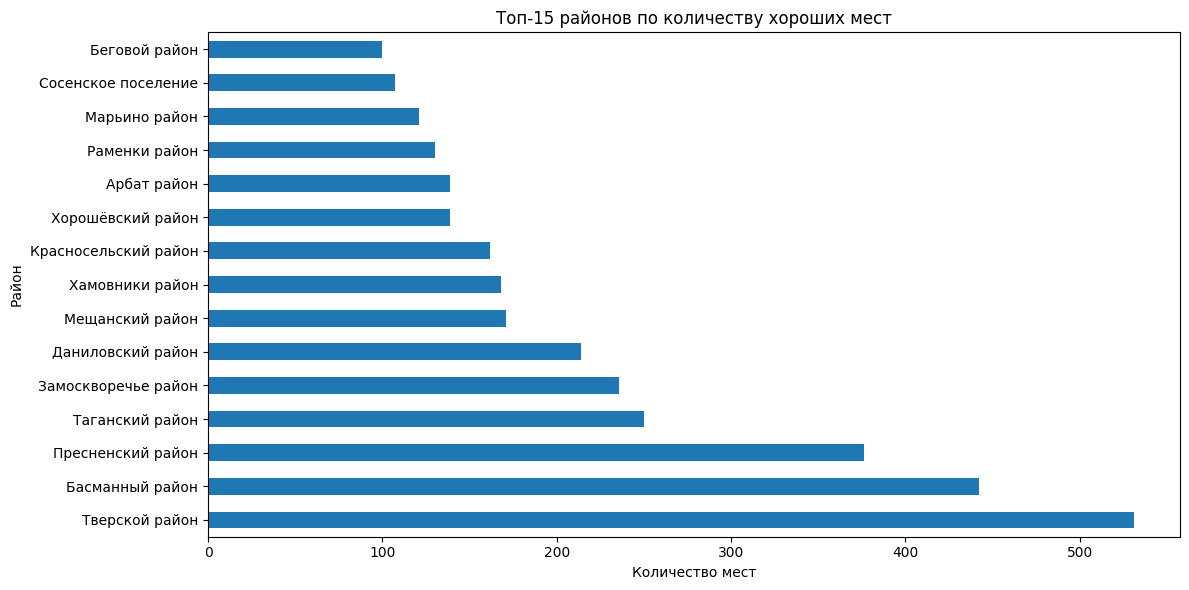

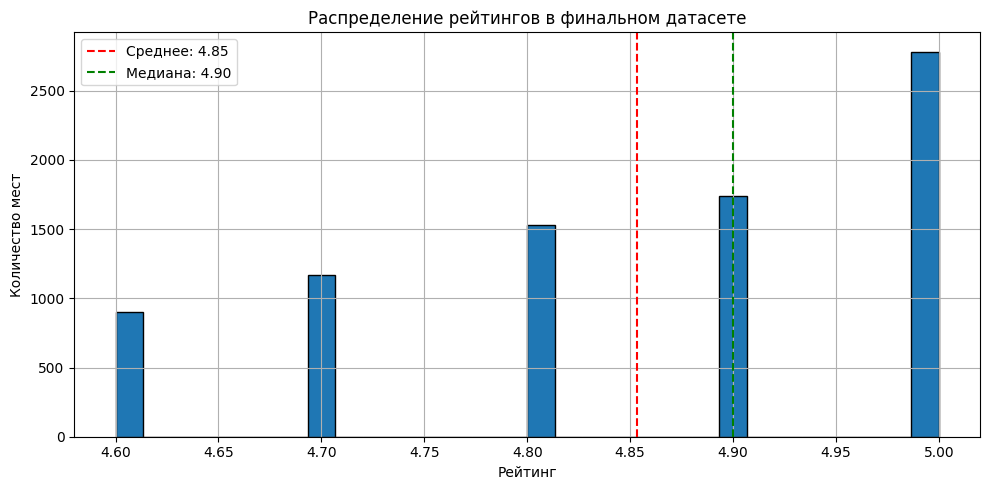

In [129]:
plt.figure(figsize=(12, 6))
top_districts = df_to_save['district'].value_counts().head(15)
top_districts.plot(kind='barh')
plt.title('Топ-15 районов по количеству хороших мест')
plt.xlabel('Количество мест')
plt.ylabel('Район')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
df_to_save['rating'].hist(bins=30, edgecolor='black')
plt.axvline(x=df_to_save['rating'].mean(), color='r', linestyle='--', label=f'Среднее: {df_to_save["rating"].mean():.2f}')
plt.axvline(x=df_to_save['rating'].median(), color='g', linestyle='--', label=f'Медиана: {df_to_save["rating"].median():.2f}')
plt.title('Распределение рейтингов в финальном датасете')
plt.xlabel('Рейтинг')
plt.ylabel('Количество мест')
plt.legend()
plt.tight_layout()
plt.show()
